<a href="https://colab.research.google.com/github/NguyenXuanHieu19146334/Nguyen-Xuan-Hieu/blob/main/Nhan%20dien%20hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

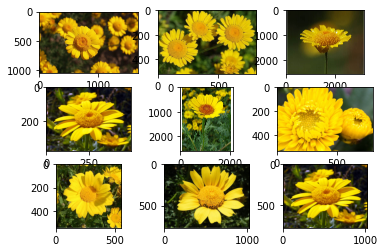

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder = '/content/drive/MyDrive/Colab Notebooks/Hoa/'
for i in range(9):
  plt.subplot(330 + i +1)
  filename = folder + 'cucvang' + str(i + 1) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [2]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder = '/content/drive/MyDrive/Colab Notebooks/Hoa/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('cucvang'):
    output = 0.0
  elif file.startswith('thuocduoc'):
    output = 1.0
  elif file.startswith('mtroi'):
    output = 2.0
  elif file.startswith('vtho'):
    output = 3.0
  # elif file.startswith('muoingandong'):
  #   output = 4.0
  # elif file.startswith('haimuoingandong.'):
  #   output = 5.0
  # elif file.startswith('nammuoingandong.'):
  #   output = 6.0
  # elif file.startswith('mottramngandong.'):
  #   output = 7.0
  # elif file.startswith('haitramngandong.'):
  #   output = 8.0
  # elif file.startswith('namtramngandong'):
  #   output = 9.0
  photo = load_img(folder + file, target_size=(200,200))
  photo = img_to_array(photo)  # O dong nay anh da bi thay doi.
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

save('10foods.npy', photos)
save('10foods.npy', labels)


(60, 200, 200, 3) (60,)


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200,200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))




In [11]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(photos, labels, batch_size=64,epochs=20, verbose=1)
model.save('hoa.h5')
classes = ["cucvang","thuocduoc","mtroi","vtho"]

Epoch 1/20
1/1 [==============================] - 1s 633ms/step - loss: 42.3024 - accuracy: 0.2333
Epoch 2/20
1/1 [==============================] - 0s 111ms/step - loss: 1942.2031 - accuracy: 0.2500
Epoch 3/20
1/1 [==============================] - 0s 89ms/step - loss: 1078.0825 - accuracy: 0.2500
Epoch 4/20
1/1 [==============================] - 0s 89ms/step - loss: 1628.2556 - accuracy: 0.2500
Epoch 5/20
1/1 [==============================] - 0s 87ms/step - loss: 1564.8776 - accuracy: 0.2500
Epoch 6/20
1/1 [==============================] - 0s 87ms/step - loss: 337.1373 - accuracy: 0.2500
Epoch 7/20
1/1 [==============================] - 0s 87ms/step - loss: 252.8314 - accuracy: 0.2667
Epoch 8/20
1/1 [==============================] - 0s 87ms/step - loss: 119.8049 - accuracy: 0.2500
Epoch 9/20
1/1 [==============================] - 0s 87ms/step - loss: 75.3544 - accuracy: 0.4500
Epoch 10/20
1/1 [==============================] - 0s 85ms/step - loss: 52.2437 - accuracy: 0.4833
Epoch 

[[0.2522734  0.23845944 0.2600935  0.24917361]]
[2]
mtroi


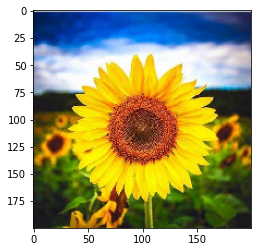

In [13]:
import matplotlib.pyplot as plt
import numpy as np
img = load_img('testmtroi2.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
print(y_classes)
print(classes[y_classes[0]])

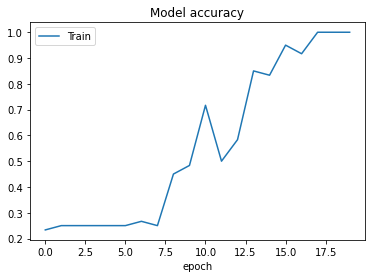

In [14]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Link github

In [ ]:
https://drive.google.com/drive/folders/1IJMivhh_aAx-HFVDdB-4Lx8Q_etz1d2P?usp=sharing